# Group1 -Final Project - EDA and LSTM model on tdcsfog

### Sihe Zheng, szheng12@depaul.edu
### YunTzu Yu, yyu54@depaul.edu
### Saruul Enkhtur, senkhtur@depaul.edu
### Lukasz Grzybek, lgrzybek@depaul.edu


#### DePaul University, College of Computing and Digital Media,
#### DSC 672 DATA SCIENCE CAPSTONE

### Set API to download the code on Kaggle

In [ ]:
import os
import json

# Set Kaggle config directory
os.environ['KAGGLE_CONFIG_DIR'] = '/home/ec2-user/.kaggle'

# Install Kaggle package
!pip install -q kaggle

# Create .kaggle directory if it doesn't exist
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Set API token
api_token = {"username": "yuyuntzu", "key": "36a47f4caf7a7293cda65222d4f16b7c"}

# Write API token to file
file_path = os.path.join(kaggle_dir, "kaggle.json")
with open(file_path, 'w') as file:
    json.dump(api_token, file)

# Set permissions
os.chmod(file_path, 0o600)

# Download competition data
!kaggle competitions download -c tlvmc-parkinsons-freezing-gait-prediction

^C
ERROR: Operation cancelled by user
/bin/sh: kaggle: command not found


In [ ]:
import zipfile

# Specify the path to your zip file
zip_file_path = 'tlvmc-parkinsons-freezing-gait-prediction.zip'

# Specify the directory where you want to extract the contents
extract_to_dir = 'train/tdcsfog/'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_to_dir)

print("Zip file extracted successfully.")

'import zipfile\n\n# Specify the path to your zip file\nzip_file_path = \'tlvmc-parkinsons-freezing-gait-prediction.zip\'\n\n# Specify the directory where you want to extract the contents\nextract_to_dir = \'train/tdcsfog/\'\n\n# Create a ZipFile object\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    # Extract all the contents to the specified directory\n    zip_ref.extractall(extract_to_dir)\n\nprint("Zip file extracted successfully.")'

In [ ]:
# Reduce Memory Usage
# reference : https://www.kaggle.com/code/arjanso/reducing-dataframe-memory-size-by-65 @ARJANGROEN

def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage became: ",mem_usg," MB")

    return df

In [ ]:
DATA_ROOT_TDCSFOG = 'tdcsfog'
tdcsfog = pd.DataFrame()
for root, dirs, files in os.walk(DATA_ROOT_TDCSFOG):
    for name in files:
        f = os.path.join(root, name)
        df_list= pd.read_csv(f)
        words = name.split('.')[0]
        df_list['file']= name.split('.')[0]
        tdcsfog = pd.concat([tdcsfog, df_list], axis=0)
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,file
0,0,-9.565628,0.245092,0.134547,0,0,0,7d7c4e6da1
1,1,-9.583326,0.222866,0.166202,0,0,0,7d7c4e6da1
2,2,-9.570981,0.193994,0.189100,0,0,0,7d7c4e6da1
3,3,-9.564660,0.182033,0.224955,0,0,0,7d7c4e6da1
4,4,-9.580095,0.173495,0.216037,0,0,0,7d7c4e6da1
...,...,...,...,...,...,...,...,...
5806,5806,-9.921166,-0.632141,0.202282,0,0,0,98ebb603a3
5807,5807,-9.787013,-0.707607,0.229738,0,0,0,98ebb603a3
5808,5808,-9.829478,-0.279642,-0.680277,0,0,0,98ebb603a3
5809,5809,-9.757977,-0.574049,-0.444084,0,0,0,98ebb603a3


In [ ]:
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 154.95 MB
Memory usage became:  154.95413208007812  MB


In [ ]:
tdcsfog_metadata = pd.read_csv("tdcsfog_metadata.csv")
tdcsfog_metadata

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


In [ ]:
tdcsfog_m= tdcsfog_metadata.merge(tdcsfog, how = 'inner', left_on = 'Id', right_on = 'file')
tdcsfog_m.drop(['file'], axis = 1, inplace = True)
tdcsfog_m=reduce_memory_usage(tdcsfog_m)

Memory usage of dataframe is 410.86 MB
Memory usage became:  181.89868545532227  MB


In [ ]:
tdcsfog_m.memory_usage().sum() / 1024**2

181.89868545532227

In [ ]:
tdcsfog_m

,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,003f117e14,4dc2f8,3,2,on,0,-9.531250,0.566406,-1.413086,0,0,0
1,003f117e14,4dc2f8,3,2,on,1,-9.539062,0.563965,-1.440430,0,0,0
2,003f117e14,4dc2f8,3,2,on,2,-9.531250,0.561523,-1.429688,0,0,0
3,003f117e14,4dc2f8,3,2,on,3,-9.531250,0.564453,-1.415039,0,0,0
4,003f117e14,4dc2f8,3,2,on,4,-9.539062,0.562012,-1.429688,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7062667,ffda8fadfd,7fcee9,20,1,off,4220,-9.406250,0.088989,-3.220703,0,0,0
7062668,ffda8fadfd,7fcee9,20,1,off,4221,-9.406250,0.090515,-3.216797,0,0,0
7062669,ffda8fadfd,7fcee9,20,1,off,4222,-9.406250,0.084351,-3.224609,0,0,0
7062670,ffda8fadfd,7fcee9,20,1,off,4223,-9.406250,0.084229,-3.236328,0,0,0


### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Basic Info:")
print(tdcsfog_m.info())

# Summary statistics
print("\nSummary Statistics:")
print(tdcsfog_m.describe())

# Check for missing values
print("\nMissing Values:")
print(tdcsfog_m.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(tdcsfog_m.duplicated().sum())

# Distribution of categorical variables
print("\nDistribution of Categorical Variables:")
for col in tdcsfog_m.select_dtypes(include=['object']).columns:
    print("\n", col, ":")
    print(tdcsfog_m[col].value_counts())



Basic Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7062672 entries, 0 to 7062671
Data columns (total 12 columns):
 #   Column           Dtype   
---  ------           -----   
 0   Id               category
 1   Subject          category
 2   Visit            int8    
 3   Test             int8    
 4   Medication       category
 5   Time             int32   
 6   AccV             float16 
 7   AccML            float16 
 8   AccAP            float16 
 9   StartHesitation  int8    
 10  Turn             int8    
 11  Walking          int8    
dtypes: category(3), float16(3), int32(1), int8(5)
memory usage: 181.9 MB
None

Summary Statistics:
              Visit          Test          Time          AccV         AccML  \
count  7.062672e+06  7.062672e+06  7.062672e+06  7.062672e+06  7.062672e+06   
mean   7.352151e+00  2.093533e+00  9.289467e+03           NaN           NaN   
std    6.779498e+00  8.301861e-01  1.399893e+04  0.000000e+00  0.000000e+00   
min    2.000000e+00  1.00

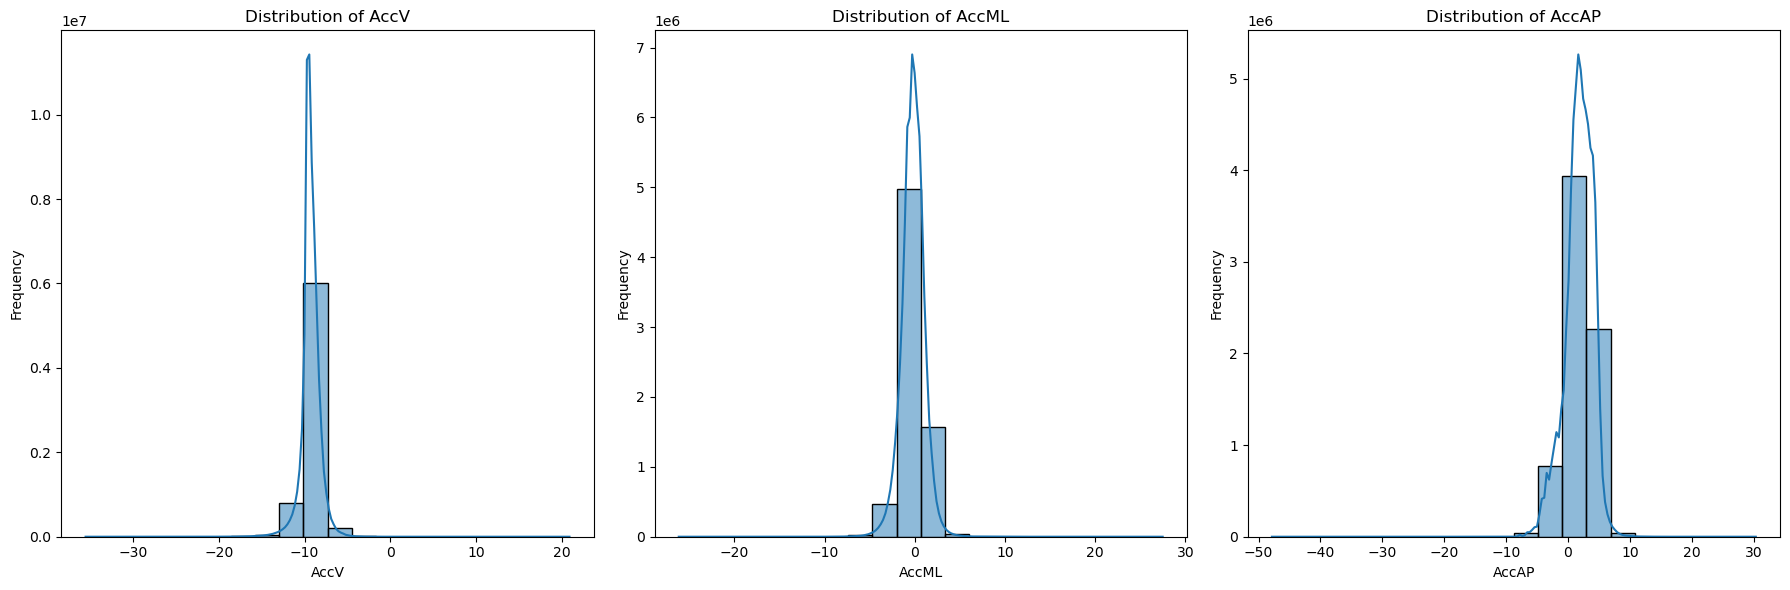

In [ ]:
# Visualizations - Distribution of Features

import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot histogram for AccV
sns.histplot(tdcsfog_m['AccV'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of AccV')
axes[0].set_xlabel('AccV')
axes[0].set_ylabel('Frequency')

# Plot histogram for AccML
sns.histplot(tdcsfog_m['AccML'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of AccML')
axes[1].set_xlabel('AccML')
axes[1].set_ylabel('Frequency')

# Plot histogram for AccAP
sns.histplot(tdcsfog_m['AccAP'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of AccAP')
axes[2].set_xlabel('AccAP')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Total Entries: 7,062,672

Columns: 12

Data Types:

Object: Id, Subject, Medication

Integers: Visit, Test, Time

Floats: AccV, AccML, AccAP

Integers (Categorical): StartHesitation, Turn, Walking

Memory Usage: Approximately 410.9 MB

Summary Statistics:

Visits: Mean visit count is approximately 7.35 with a standard deviation of approximately 6.78.

Tests: Mean test count is approximately 2.09 with a standard deviation of approximately 0.83.

Time: The data spans a range from 0 to approximately 97076 with a mean time of approximately 9289.47.

Acceleration (AccV, AccML, AccAP):

The mean, standard deviation, and range vary for each acceleration component.

Some missing values are indicated by 'nan'.

Categorical Variables (StartHesitation, Turn, Walking):

The mean values indicate the proportion of occurrences for each category.

These categories are binary, with 0 indicating absence and 1 indicating presence.

Missing Values:

No missing values were found for any column.

Duplicate Rows:

No duplicate rows were found.

Distribution of Categorical Variables:

Id:

The dataset contains 833 unique Ids, with some Ids occurring more frequently than others.

Subject:

There are62 unique subjects, with some subjects having significantly more data points than others.

Medication:

The majority of entries have 'on' medication, with approximately 4.26 million entries, while 'off' medication has approximately 2.80 million entries.

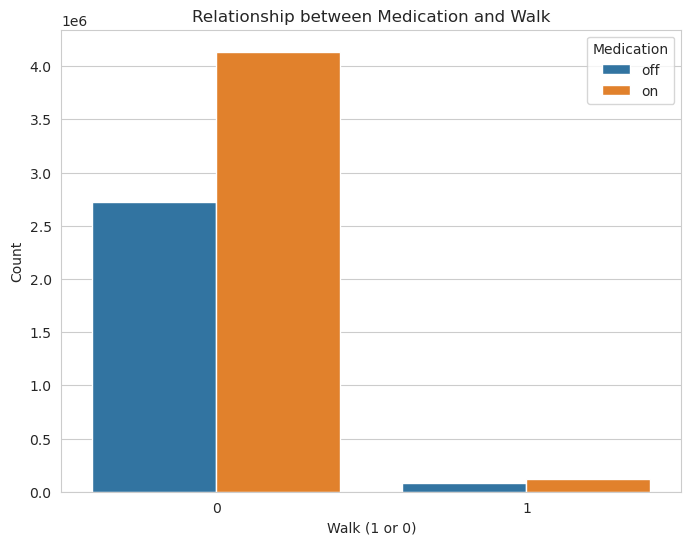

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x="Walking", hue="Medication", data=tdcsfog_m)

# Add labels and title
plt.title("Relationship between Medication and Walk")
plt.xlabel("Walk (1 or 0)")
plt.ylabel("Count")
plt.legend(title="Medication", loc="upper right")

# Show the plot
plt.show()


In [ ]:
# Extract counts for each category
counts = tdcsfog_m.groupby(["Walking", "Medication"]).size()

# Calculate percentage or ratio for each category
total_counts = counts.sum()
medication_counts = counts[1].sum()
no_medication_counts = counts[0].sum()

# Calculate percentage or ratio
medication_ratio = medication_counts / total_counts
no_medication_ratio = no_medication_counts / total_counts

print("Percentage of participants on medication who walk:", medication_ratio)
print("Percentage of participants not on medication who walk:", no_medication_ratio)

Percentage of participants on medication who walk: 0.029427672699510892
Percentage of participants not on medication who walk: 0.9705723273004891


In [ ]:
tdcsfog_m.corr()

/tmp/ipykernel_30667/385006741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tdcsfog_m.corr()


,Visit,Test,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
Visit,1.000000,-0.028446,0.298416,0.081560,-0.207993,0.166725,0.141114,0.077839,0.185270
Test,-0.028446,1.000000,0.104004,0.008843,-0.002186,0.020823,0.019439,0.036357,-0.006699
Time,0.298416,0.104004,1.000000,0.113572,-0.228152,0.283742,0.014704,0.414180,0.345438
AccV,0.081560,0.008843,0.113572,1.000000,-0.011354,0.150404,0.042428,0.068672,0.044488
AccML,-0.207993,-0.002186,-0.228152,-0.011354,1.000000,-0.112350,-0.093962,-0.080854,-0.098163
AccAP,0.166725,0.020823,0.283742,0.150404,-0.112350,1.000000,0.135413,0.254215,0.120627
StartHesitation,0.141114,0.019439,0.014704,0.042428,-0.093962,0.135413,1.000000,-0.118589,-0.036979
Turn,0.077839,0.036357,0.414180,0.068672,-0.080854,0.254215,-0.118589,1.000000,-0.097233
Walking,0.185270,-0.006699,0.345438,0.044488,-0.098163,0.120627,-0.036979,-0.097233,1.000000


/tmp/ipykernel_30667/3590070680.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tdcsfog_m.corr(), annot=True, cmap='coolwarm', fmt=".2f")


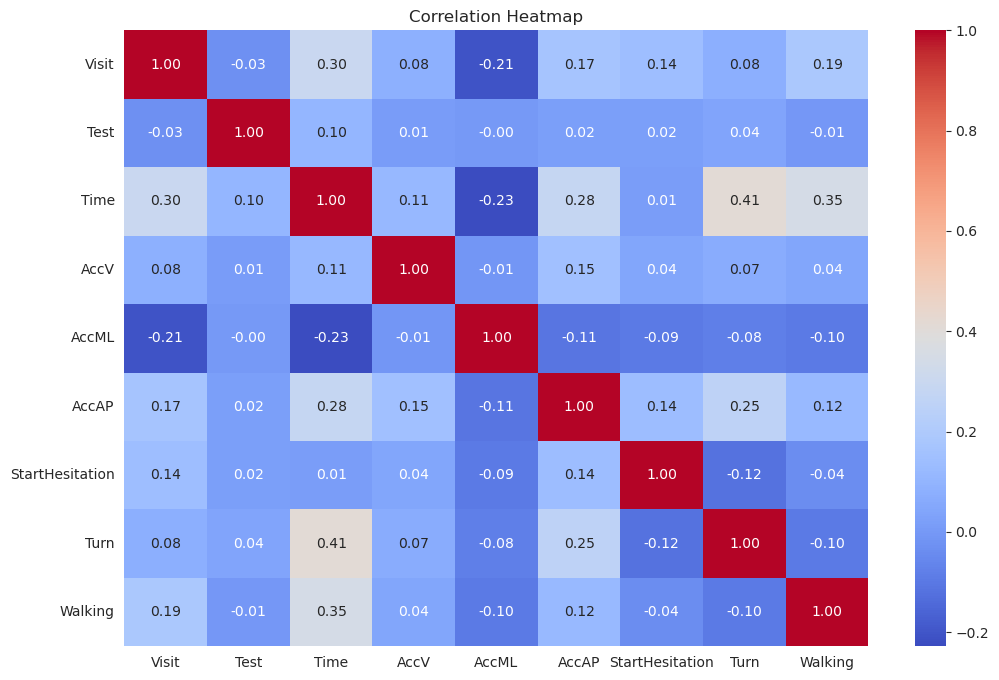

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tdcsfog_m.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

 Positive Correlations:

There is a moderate positive correlation (0.30) between "Time" and "Visit", indicating that as time increases, the number of visits tends to increase as well.
A weak positive correlation (0.19) is observed between "Walking" and "Visit", suggesting that more visits may be associated with increased walking activity.
Similarly, there is a weak positive correlation (0.17) between "AccAP" (anteroposterior acceleration) and "StartHesitation", indicating that a higher degree of anteroposterior acceleration may be associated with more instances of hesitation at the start.
A weak positive correlation (0.14) is also seen between "StartHesitation" and "Visit".
Negative Correlations:

There is a weak negative correlation (-0.21) between "AccML" (medial-lateral acceleration) and "StartHesitation", suggesting that higher levels of medial-lateral acceleration may be associated with fewer instances of hesitation at the start.
A weak negative correlation (-0.23) is observed between "Time" and "AccML", implying that as time increases, there might be a slight decrease in medial-lateral acceleration.
Weak Correlations:

"Test" shows very weak correlations with other variables, indicating limited association with the rest of the features.
"Turn" displays weak correlations with other variables as well, although it has a slightly stronger correlation (0.41) with "Time", suggesting a modest association between turning behavior and the passage of time.

In [ ]:
# Selecting the target columns
target_columns = ['StartHesitation', 'Turn', 'Walking']

# Creating a DataFrame with only the target columns
target_df = tdcsfog_m[target_columns]
for column in target_df.columns:
    print(target_df[column].value_counts())


0    6757882
1     304790
Name: StartHesitation, dtype: int64
0    5383890
1    1678782
Name: Turn, dtype: int64
0    6854834
1     207838
Name: Walking, dtype: int64


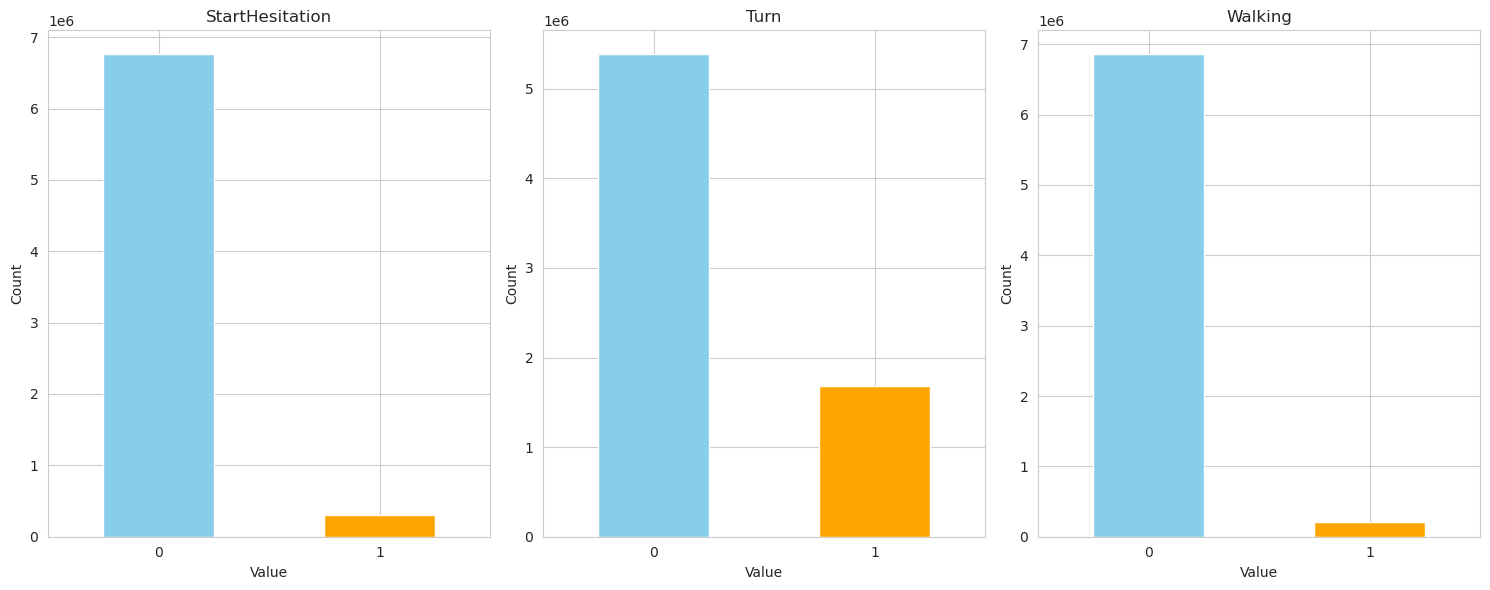

In [ ]:

import matplotlib.pyplot as plt

# Plotting the bar chart for each target column
plt.figure(figsize=(15, 6))

for i, column in enumerate(target_df.columns):
    plt.subplot(1,3,i+1)
    target_df[column].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Visualize patterns and differences in acceleration behavior during different activities.

In [ ]:
def numerizeData(df):
    # Initialize a dictionary to store summary statistics
    summary_stats = {}

    # Iterate over unique movements
    unique_movements = df['Walking'].unique()
    for movement in unique_movements:
        subset = df[df['Walking'] == movement]
        if not subset.empty:
            # Initialize a dictionary to store summary statistics for each feature
            feature_stats = {}

            # Calculate summary statistics for each feature
            for feature in ['AccV', 'AccML', 'AccAP']:
                feature_stats[feature + '_mean'] = subset[feature].mean()
                feature_stats[feature + '_std'] = subset[feature].std()
                feature_stats[feature + '_min'] = subset[feature].min()
                feature_stats[feature + '_max'] = subset[feature].max()

            # Store summary statistics for the current movement
            summary_stats[movement] = feature_stats

    return summary_stats

# Call the function with your dataset
summary_statistics = numerizeData(tdcsfog_m)

# Print summary statistics
for movement, stats in summary_statistics.items():
    print(f'Movement: {movement}')
    for feature, values in stats.items():
        print(f'{feature}: {values}')
    print('\n')


Movement: 0
AccV_mean: nan
AccV_std: 0.0
AccV_min: -35.53125
AccV_max: 20.90625
AccML_mean: nan
AccML_std: 0.0
AccML_min: -26.171875
AccML_max: 27.484375
AccAP_mean: nan
AccAP_std: 0.0
AccAP_min: -47.84375
AccAP_max: 30.34375


Movement: 1
AccV_mean: nan
AccV_std: 0.0
AccV_min: -26.484375
AccV_max: 3.412109375
AccML_mean: nan
AccML_std: 0.0
AccML_min: -23.234375
AccML_max: 24.546875
AccAP_mean: nan
AccAP_std: 0.0
AccAP_min: -19.359375
AccAP_max: 29.34375




/tmp/ipykernel_30667/2612649146.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_movements))


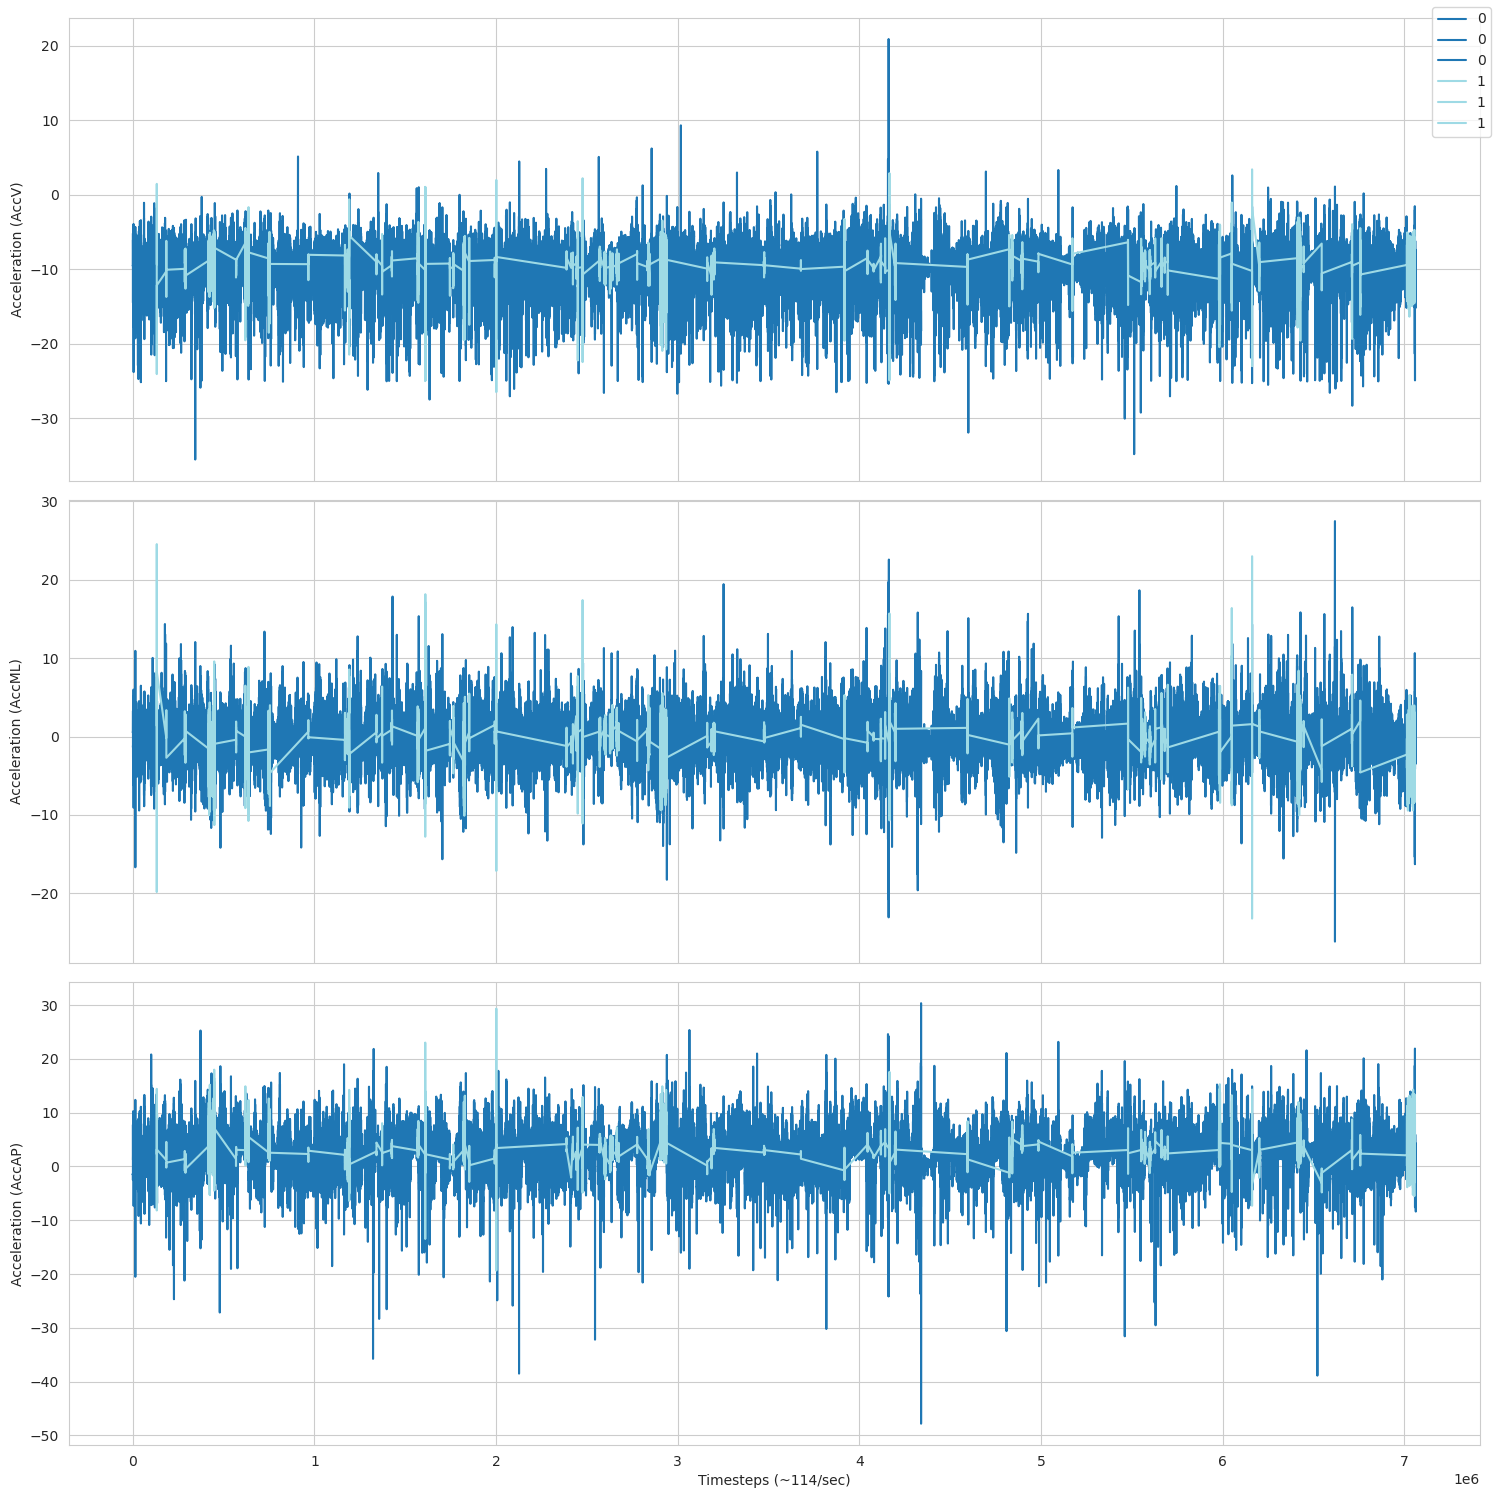

In [ ]:
import matplotlib.pyplot as plt

def labelPlot(df):
    # Set up the figure and axes for subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

    # Iterate over unique movements to assign different colors
    unique_movements = df['Walking'].unique()  # 'Walking' is the target variable
    colors = plt.cm.get_cmap('tab20', len(unique_movements))
    handles = []  # To store legend handles
    labels = []   # To store Legend Labels

    # Plot each segment with a different color
    for movement, color in zip(unique_movements, colors.colors):
        subset = df[df['Walking'] == movement]
        if not subset.empty:
            for i, feature in enumerate(['AccV', 'AccML', 'AccAP']):
                ax = axes[i]
                ax.plot(subset[feature], label=movement, color=color)  # Plot the feature
                ax.set_ylabel(f'Acceleration ({feature})')
                handles.append(ax.lines[-1])
                labels.append(movement)

    # Customize the plot
    fig.legend(handles=handles, labels=labels, loc='upper right')
    plt.xlabel('Timesteps (~114/sec)')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function with your dataset
labelPlot(tdcsfog_m)



# Modeling

In [ ]:
tdcsfog_m = pd.read_csv("full_tdcsfog.csv")

In [ ]:
tdcsfog_m = reduce_memory_usage(tdcsfog_m)

Memory usage of dataframe is 646.61 MB
Memory usage became:  127.97441101074219  MB


In [ ]:
tdcsfog_m.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Medication,Age,Sex,YearsSinceDx,NFOGQ
0,0,-9.671875,-0.097656,-2.193359,0,0,0,1,69,1,4.0,22
1,1,-9.671875,-0.094604,-2.193359,0,0,0,1,69,1,4.0,22
2,2,-9.671875,-0.092224,-2.187500,0,0,0,1,69,1,4.0,22
3,3,-9.687500,-0.092957,-2.191406,0,0,0,1,69,1,4.0,22
4,4,-9.679688,-0.093140,-2.203125,0,0,0,1,69,1,4.0,22


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(tdcsfog_m):
    # Extract features and target variables
    X = tdcsfog_m[['AccV', 'AccML', 'AccAP']].values
    y = tdcsfog_m[['StartHesitation', 'Turn', 'Walking']].values

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape features for LSTM
    X = X.reshape((X.shape[0], 1, X.shape[1]))

    # Convert target variables to integers
    y = np.argmax(y, axis=1)

    # Split data into training and testing sets
    trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

    return trainX, trainy, testX, testy

trainX, trainy, testX, testy = preprocess_data(tdcsfog_m)

def evaluate_model(trainX, trainy, testX, testy, epochs):
    verbose, epochs, batch_size = 1, epochs, 64
    n_outputs = trainy.shape[1]  # Number of output variables

    # Define callbacks
    callback = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

    # Define model
    model = Sequential(name='LSTM_Model')
    model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dense(3))  # Output layer with 3 neurons for 3 target variables

    # Compile model
    opt = Adam(learning_rate=1e-5)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    model.summary()

    # Fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[callback, mc])

    # Evaluate model
    saved_model = load_model('best_model.h5')
    loss, accuracy, precision, recall = saved_model.evaluate(testX, testy, batch_size=batch_size, verbose=1)

    # Make predictions
    predictions = saved_model.predict(testX)

    return history, predictions, accuracy, loss, precision, recall



2024-03-08 23:03:34.944707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 23:03:51.641785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:

trainX, trainy, testX, testy = preprocess_data(tdcsfog_m)

In [ ]:
trainX.shape

(5650137, 1, 3)

In [ ]:
trainy.shape

(5650137,)

In [ ]:
testX.shape

(1412535, 1, 3)

In [ ]:
testy.shape

(1412535,)

In [ ]:
def run_experiment(trainX, trainy, testX, testy, epochs=5, repeats=3):
    # Initialize lists to store metrics for each repetition
    accuracies = []
    precisions = []
    recalls = []
    losses = []
    histories = []
    predictions = {}

    for r in range(repeats):
        history, prediction, accuracy, precision, recall, loss = evaluate_model(trainX, trainy, testX, testy, epochs)

        # Append metrics to lists
        accuracies.append(accuracy * 100.0)
        precisions.append(precision * 100.0)
        recalls.append(recall * 100.0)
        losses.append(loss)
        histories.append(history)

        # Store predictions for each repetition
        predictions[r+1] = prediction

        # Print metrics for each repetition
        print(f"\nRepetition #{r+1}:")
        print(f"Accuracy: {accuracy:.3f}")
        print(f"Precision: {precision:.3f}")
        print(f"Recall: {recall:.3f}")
        print(f"Loss: {loss:.3f}")

    # Summarize results
    mean_accuracy = np.mean(accuracies)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_loss = np.mean(losses)

    return histories, predictions, mean_accuracy, mean_precision, mean_recall, mean_loss





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import gc

def result_plots(histories):
    # Plot accuracy, precision, recall, and loss values
    n = len(histories)

    # Lists to store mean values
    macc = histories[0].history['accuracy']
    mval_acc = histories[0].history['val_accuracy']

    mloss = histories[0].history['loss']
    mval_loss = histories[0].history['val_loss']

    if n > 1:
        # Iterate over trials/histories
        for i in range(1, n):
            # Add Lists of values for each metric together
            macc += np.array(histories[i].history['accuracy'])
            mval_acc += np.array(histories[i].history['val_accuracy'])

            mloss += np.array(histories[i].history['loss'])
            mval_loss += np.array(histories[i].history['val_loss'])

        # Get metric means of all trials
        macc /= n
        mval_acc /= n

        mloss /= n
        mval_loss /= n

    # Create a  grid of subplots
    fig, axs = plt.subplots(2, 1)

    # Plot metrics in each subplot
    axs[0].plot(macc, label='Accuracy')
    axs[0].plot(mval_acc, label='Validation Accuracy')
    axs[0].set_title('Accuracy vs Validation Accuracy')
    axs[0].legend()

    axs[1].plot(mloss, label='Loss')
    axs[1].plot(mval_loss, label='Validation Loss')
    axs[1].set_title('Loss vs Validation Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()




Shape of trainy_encoded: (5650137, 3)
Shape of testy_encoded: (1412535, 3)


2024-03-08 23:07:29.987096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 17603 (68.76 KB)
Trainable params: 17603 (68.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
88282/88284 [============================>.] - ETA: 0s - loss: 0.1418 - accuracy: 0.7321 - precision: 0.7327 - recall: 0.6575
Epoch 1: val_loss improved from inf to 0.12561, saving model to best_model.h5
88284/88284 [==============================] - 343s 4ms/step - loss: 0.1418 - accuracy: 0.7321 - precision: 0.7327 - recall: 0.6575 - val_loss: 0.1256 - val_accuracy: 0.7330 - val_precision: 0.7357 - va

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88283/88284 [============================>.] - ETA: 0s - loss: 0.1250 - accuracy: 0.7319 - precision: 0.7376 - recall: 0.7242
Epoch 2: val_loss improved from 0.12561 to 0.12468, saving model to best_model.h5
88284/88284 [==============================] - 337s 4ms/step - loss: 0.1250 - accuracy: 0.7319 - precision: 0.7376 - recall: 0.7242 - val_loss: 0.1247 - val_accuracy: 0.7315 - val_precision: 0.7377 - val_recall: 0.7233
Epoch 3/5
88275/88284 [============================>.] - ETA: 0s - loss: 0.1248 - accuracy: 0.7313 - precision: 0.7376 - recall: 0.7231
Epoch 3: val_loss improved from 0.12468 to 0.12465, saving model to best_model.h5
88284/88284 [==============================] - 338s 4ms/step - loss: 0.1248 - accuracy: 0.7313 - precision: 0.7376 - recall: 0.7231 - val_loss: 0.1246 - val_accuracy: 0.7313 - val_precision: 0.7381 - val_recall: 0.7227
Epoch 4/5
88283/88284 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.7313 - precision: 0.7379 - recall: 0.7228


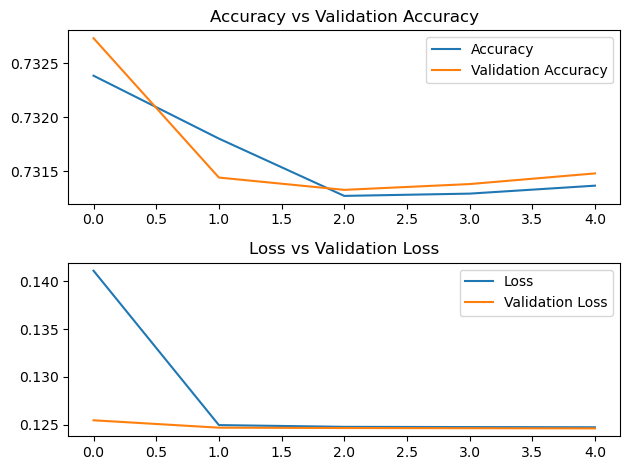

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import gc

def tunePipeline(trainX, trainy, testX, testy):
    # Reshape and standardize arrays
    scaler = MinMaxScaler(feature_range=(-1, 1))
    trainX = scaler.fit_transform(trainX.reshape(-1, trainX.shape[-1])).reshape(trainX.shape)
    testX = scaler.transform(testX.reshape(-1, testX.shape[-1])).reshape(testX.shape)

    # One-hot encode y
    trainy_encoded = to_categorical(trainy)
    testy_encoded = to_categorical(testy)

    # Verify the shape of one-hot encoded labels
    print("Shape of trainy_encoded:", trainy_encoded.shape)
    print("Shape of testy_encoded:", testy_encoded.shape)

    # Fit and evaluate model
    histories, predictions, a, p, r, l = run_experiment(trainX, trainy_encoded, testX, testy_encoded, 5, 3)

    # Plot training/validation scores for each epoch
    result_plots(histories)

    return histories, predictions, a, p, r, l

histories, predictions, a, p, r, l = tunePipeline(trainX, trainy, testX, testy)
